# OpenCV Color Processing Tutorial

This notebook explores color space operations, histogram processing, and color enhancement techniques in OpenCV.

## Contents
1. [Setup and Installation](#setup)
2. [Color Space Conversions](#color-spaces)
3. [Histogram Analysis](#histograms)
4. [Color Enhancement](#enhancement)
5. [Color-based Segmentation](#segmentation)
6. [Practical Applications](#applications)
7. [Exercises](#exercises)

## 1. Setup and Installation {#setup}

First, let's import the necessary libraries and our custom modules.

In [86]:
# Install required packages if not already installed
# !pip install opencv-python numpy matplotlib

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Add our source directory to Python path
sys.path.append('../src')

# Import our custom modules
from color_processing import color_spaces, histogram, color_enhancement
from basic_operations import image_io, display
from utils import visualization

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


In [87]:
# Reload modules to pick up any changes
import importlib
importlib.reload(color_enhancement)
print("✅ Modules reloaded successfully!")

✅ Modules reloaded successfully!


# Create Sample Colorful Image

Let's create a colorful test image to demonstrate color processing techniques.

Image shape: (300, 400, 3)
Image dtype: uint8


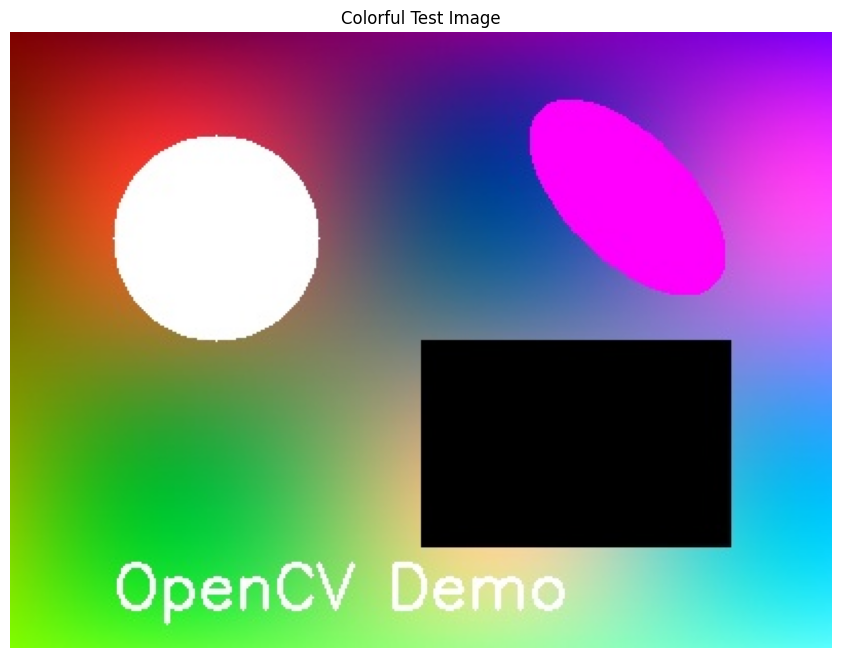

In [88]:
# Load sample image
image_path = '../sample_images/original/demo_image.jpg'
if os.path.exists(image_path):
    image = image_io.load_image(image_path)
else:
    # Create a colorful demo image
    image = np.zeros((400, 600, 3), dtype=np.uint8)
    
    # Create color gradient background
    for i in range(400):
        for j in range(600):
            image[i, j] = [
                int(255 * (i / 400)),           # Red gradient
                int(255 * (j / 600)),           # Green gradient
                int(255 * ((i + j) / 1000))     # Blue gradient
            ]
    
    # Add solid color shapes
    cv2.rectangle(image, (50, 50), (150, 150), (255, 0, 0), -1)    # Red
    cv2.rectangle(image, (200, 50), (300, 150), (0, 255, 0), -1)   # Green
    cv2.rectangle(image, (350, 50), (450, 150), (0, 0, 255), -1)   # Blue
    
    cv2.circle(image, (100, 250), 50, (255, 255, 0), -1)           # Cyan
    cv2.circle(image, (250, 250), 50, (255, 0, 255), -1)           # Magenta
    cv2.circle(image, (400, 250), 50, (0, 255, 255), -1)           # Yellow
    
    # Add white and black regions
    cv2.rectangle(image, (500, 200), (550, 250), (255, 255, 255), -1)  # White
    cv2.rectangle(image, (500, 300), (550, 350), (0, 0, 0), -1)        # Black

print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")

# Display the test image
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Colorful Test Image')
plt.axis('off')
plt.show()

## 2. Color Space Conversions {#color-spaces}

Different color spaces are useful for different types of image processing tasks.

### 2.1 RGB to HSV Conversion
HSV (Hue, Saturation, Value) separates color information from intensity.

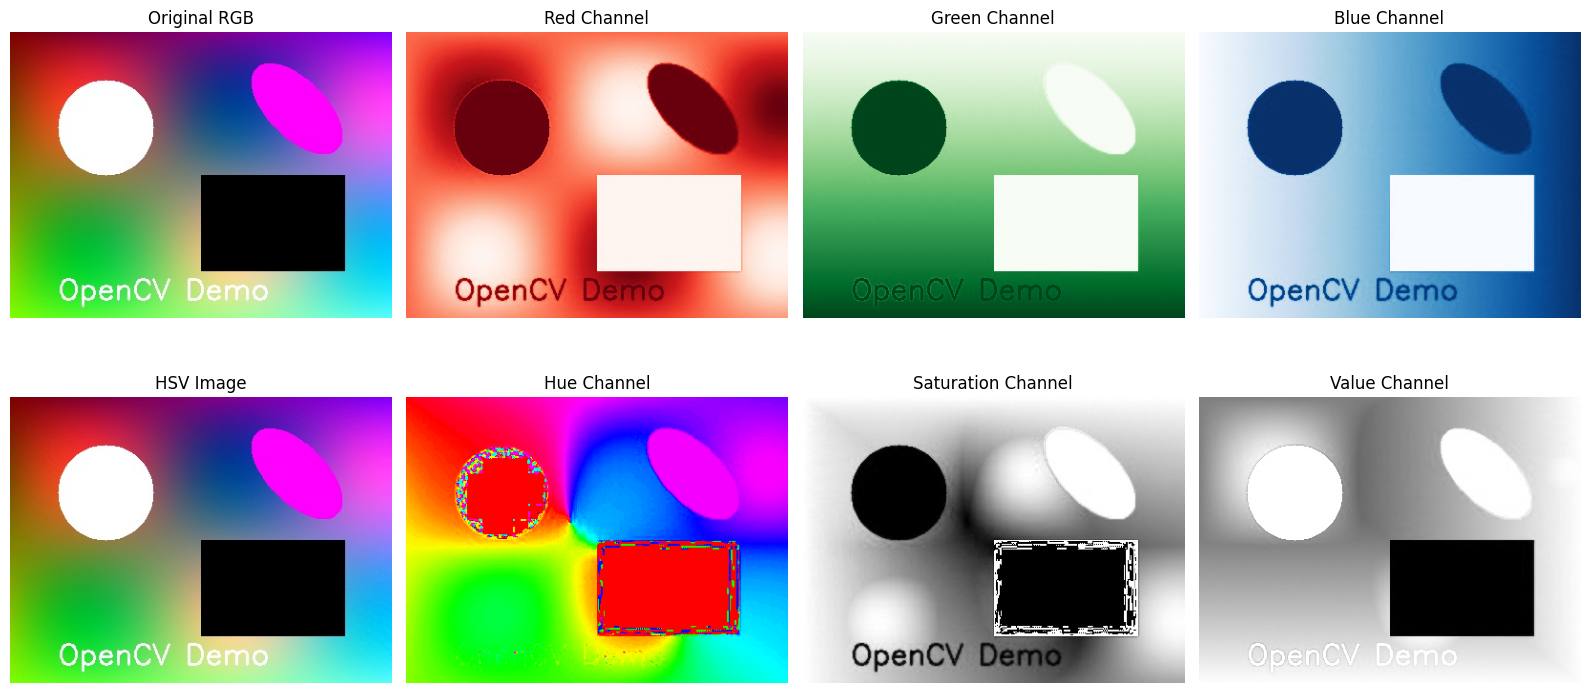

HSV ranges - H: 0-179, S: 0-255, V: 0-255


In [89]:
# Convert to HSV
hsv_image = color_spaces.rgb_to_hsv(image)

# Split HSV channels
h, s, v = cv2.split(hsv_image)

# Display RGB and HSV
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# RGB image and channels
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original RGB')
axes[0, 0].axis('off')

# RGB channels
b, g, r = cv2.split(image)
axes[0, 1].imshow(r, cmap='Reds')
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

axes[0, 2].imshow(g, cmap='Greens')
axes[0, 2].set_title('Green Channel')
axes[0, 2].axis('off')

axes[0, 3].imshow(b, cmap='Blues')
axes[0, 3].set_title('Blue Channel')
axes[0, 3].axis('off')

# HSV image and channels
axes[1, 0].imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
axes[1, 0].set_title('HSV Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(h, cmap='hsv')
axes[1, 1].set_title('Hue Channel')
axes[1, 1].axis('off')

axes[1, 2].imshow(s, cmap='gray')
axes[1, 2].set_title('Saturation Channel')
axes[1, 2].axis('off')

axes[1, 3].imshow(v, cmap='gray')
axes[1, 3].set_title('Value Channel')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

print(f"HSV ranges - H: {h.min()}-{h.max()}, S: {s.min()}-{s.max()}, V: {v.min()}-{v.max()}")

### 2.2 LAB Color Space
LAB color space is perceptually uniform and good for color difference calculations.

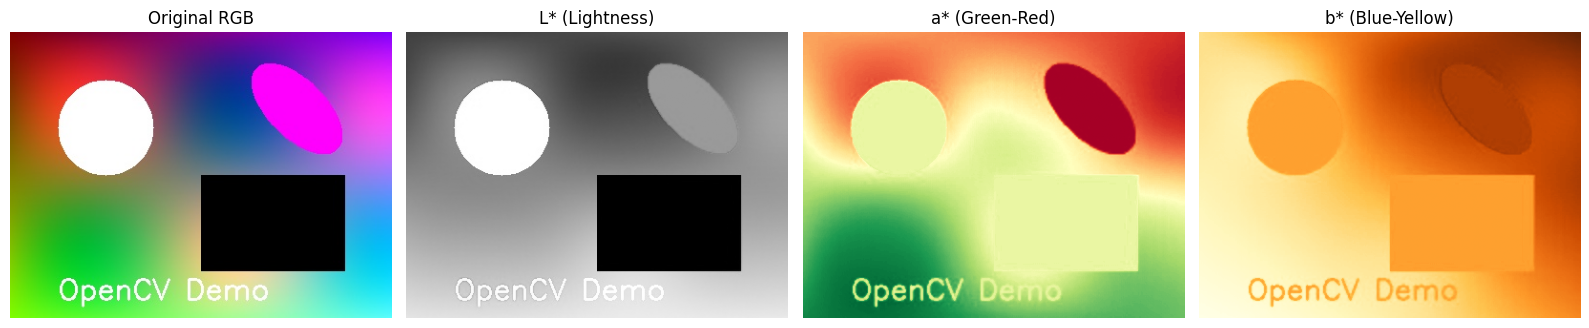

LAB ranges - L: 0-255, a: 49-226, b: 36-213


In [90]:
# Convert to LAB
lab_image = color_spaces.rgb_to_lab(image)

# Split LAB channels
l, a, b_lab = cv2.split(lab_image)

# Display LAB channels
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original RGB')
axes[0].axis('off')

axes[1].imshow(l, cmap='gray')
axes[1].set_title('L* (Lightness)')
axes[1].axis('off')

axes[2].imshow(a, cmap='RdYlGn_r')
axes[2].set_title('a* (Green-Red)')
axes[2].axis('off')

axes[3].imshow(b_lab, cmap='YlOrBr_r')
axes[3].set_title('b* (Blue-Yellow)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

print(f"LAB ranges - L: {l.min()}-{l.max()}, a: {a.min()}-{a.max()}, b: {b_lab.min()}-{b_lab.max()}")

### 2.3 Grayscale Conversions
Different methods for converting to grayscale.

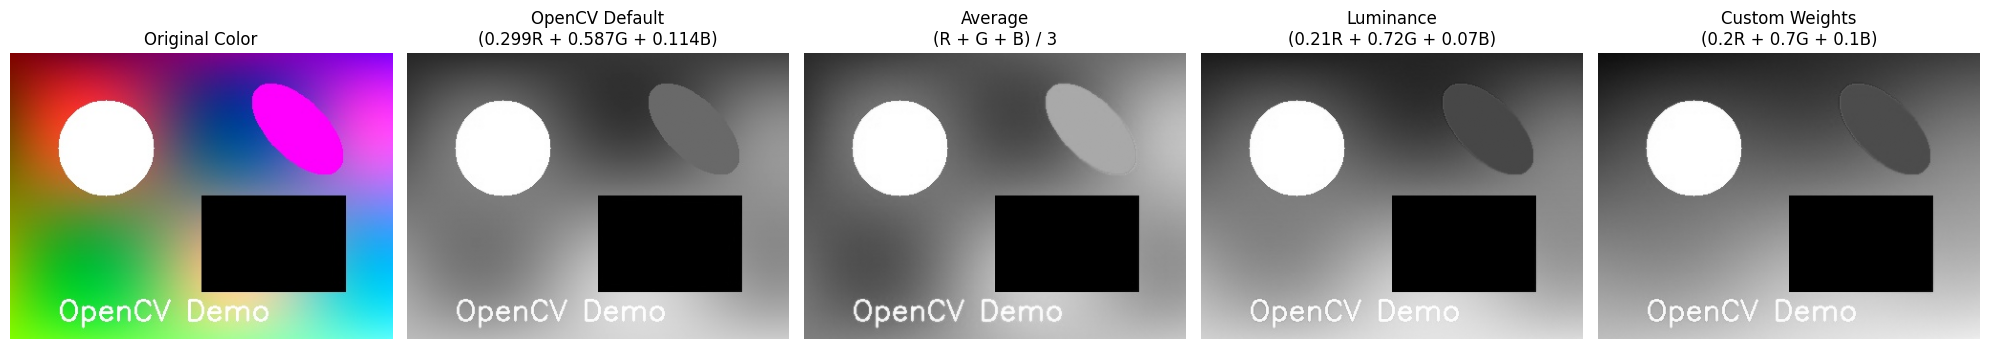

In [91]:
# Different grayscale conversion methods
gray_opencv = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_average = color_spaces.rgb_to_gray_average(image)
gray_luminance = color_spaces.rgb_to_gray_luminance(image)
gray_custom = color_spaces.rgb_to_gray_custom(image, weights=[0.2, 0.7, 0.1])

# Display different grayscale methods
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Color')
axes[0].axis('off')

axes[1].imshow(gray_opencv, cmap='gray')
axes[1].set_title('OpenCV Default\n(0.299R + 0.587G + 0.114B)')
axes[1].axis('off')

axes[2].imshow(gray_average, cmap='gray')
axes[2].set_title('Average\n(R + G + B) / 3')
axes[2].axis('off')

axes[3].imshow(gray_luminance, cmap='gray')
axes[3].set_title('Luminance\n(0.21R + 0.72G + 0.07B)')
axes[3].axis('off')

axes[4].imshow(gray_custom, cmap='gray')
axes[4].set_title('Custom Weights\n(0.2R + 0.7G + 0.1B)')
axes[4].axis('off')

plt.tight_layout()
plt.show()

## 3. Histogram Analysis {#histograms}

Histograms show the distribution of pixel intensities in images.

### 3.1 Color Histograms

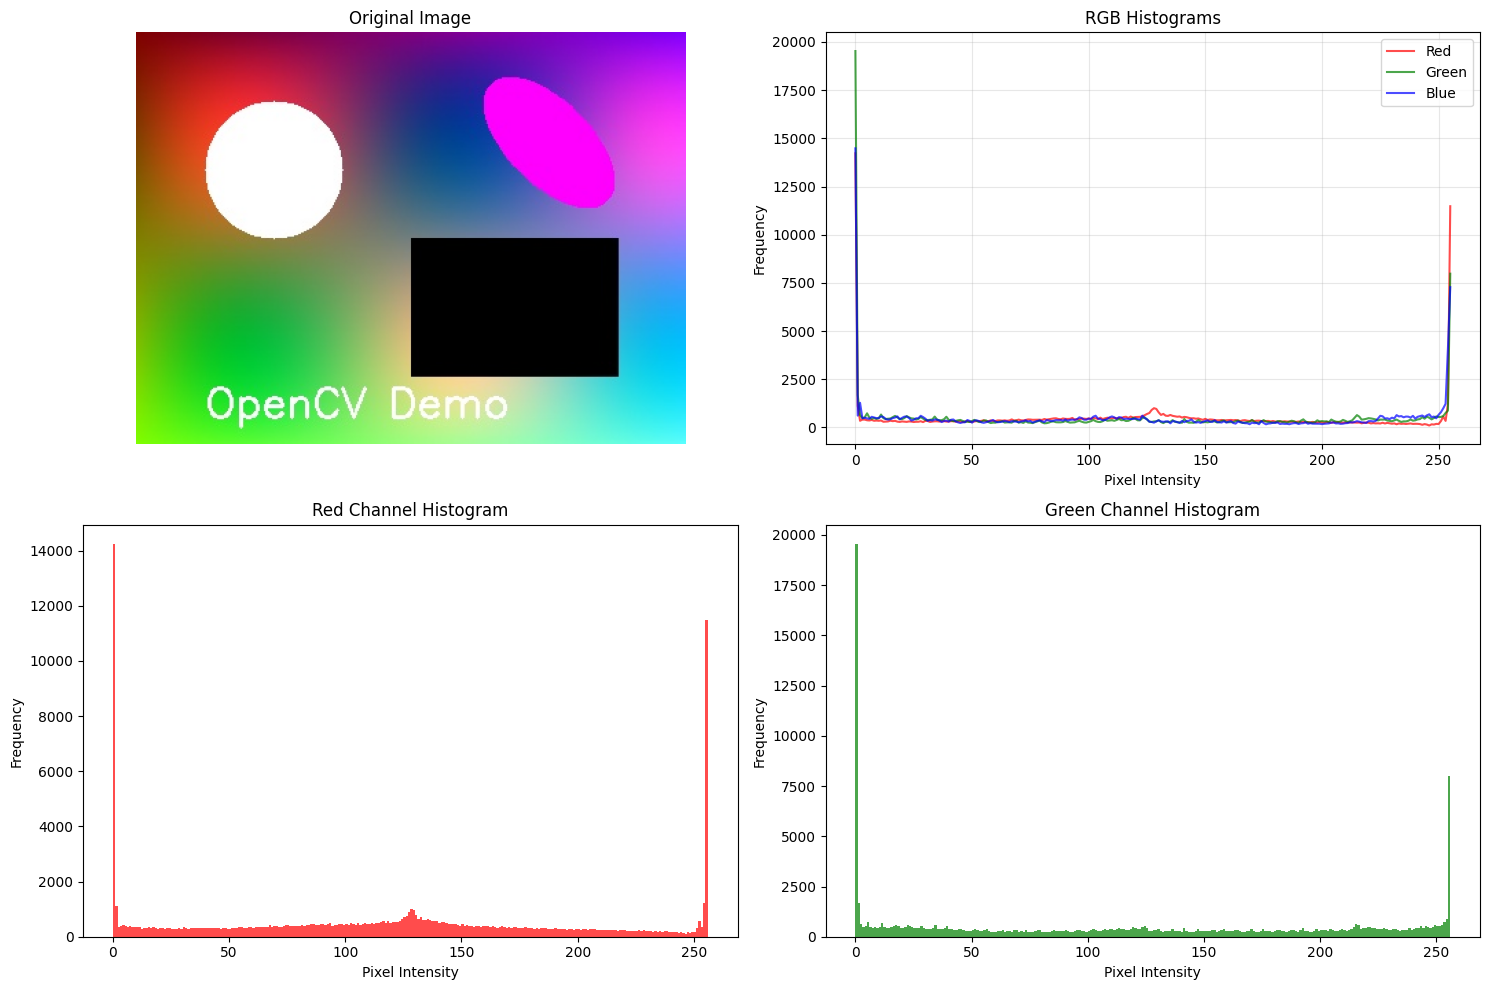

Histogram Statistics:
Red channel - Mean: 118.8, Std: 83.2
Green channel - Mean: 113.1, Std: 92.1
Blue channel - Mean: 122.0, Std: 92.0


In [92]:
# Calculate and display color histograms
# Use compute_color_histogram to get histograms for all channels
color_histograms = histogram.compute_color_histogram(image)
hist_b = color_histograms[0]  # Blue channel
hist_g = color_histograms[1]  # Green channel  
hist_r = color_histograms[2]  # Red channel

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original image
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Individual channel histograms
axes[0, 1].plot(hist_r.flatten(), color='red', alpha=0.7, label='Red')
axes[0, 1].plot(hist_g.flatten(), color='green', alpha=0.7, label='Green')
axes[0, 1].plot(hist_b.flatten(), color='blue', alpha=0.7, label='Blue')
axes[0, 1].set_title('RGB Histograms')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Separate histograms
axes[1, 0].hist(image[:,:,2].ravel(), bins=256, range=[0,256], color='red', alpha=0.7)
axes[1, 0].set_title('Red Channel Histogram')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(image[:,:,1].ravel(), bins=256, range=[0,256], color='green', alpha=0.7)
axes[1, 1].set_title('Green Channel Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print histogram statistics
print("Histogram Statistics:")
print(f"Red channel - Mean: {np.mean(image[:,:,2]):.1f}, Std: {np.std(image[:,:,2]):.1f}")
print(f"Green channel - Mean: {np.mean(image[:,:,1]):.1f}, Std: {np.std(image[:,:,1]):.1f}")
print(f"Blue channel - Mean: {np.mean(image[:,:,0]):.1f}, Std: {np.std(image[:,:,0]):.1f}")

### 3.2 Histogram Equalization
Enhancing contrast by equalizing the intensity distribution.

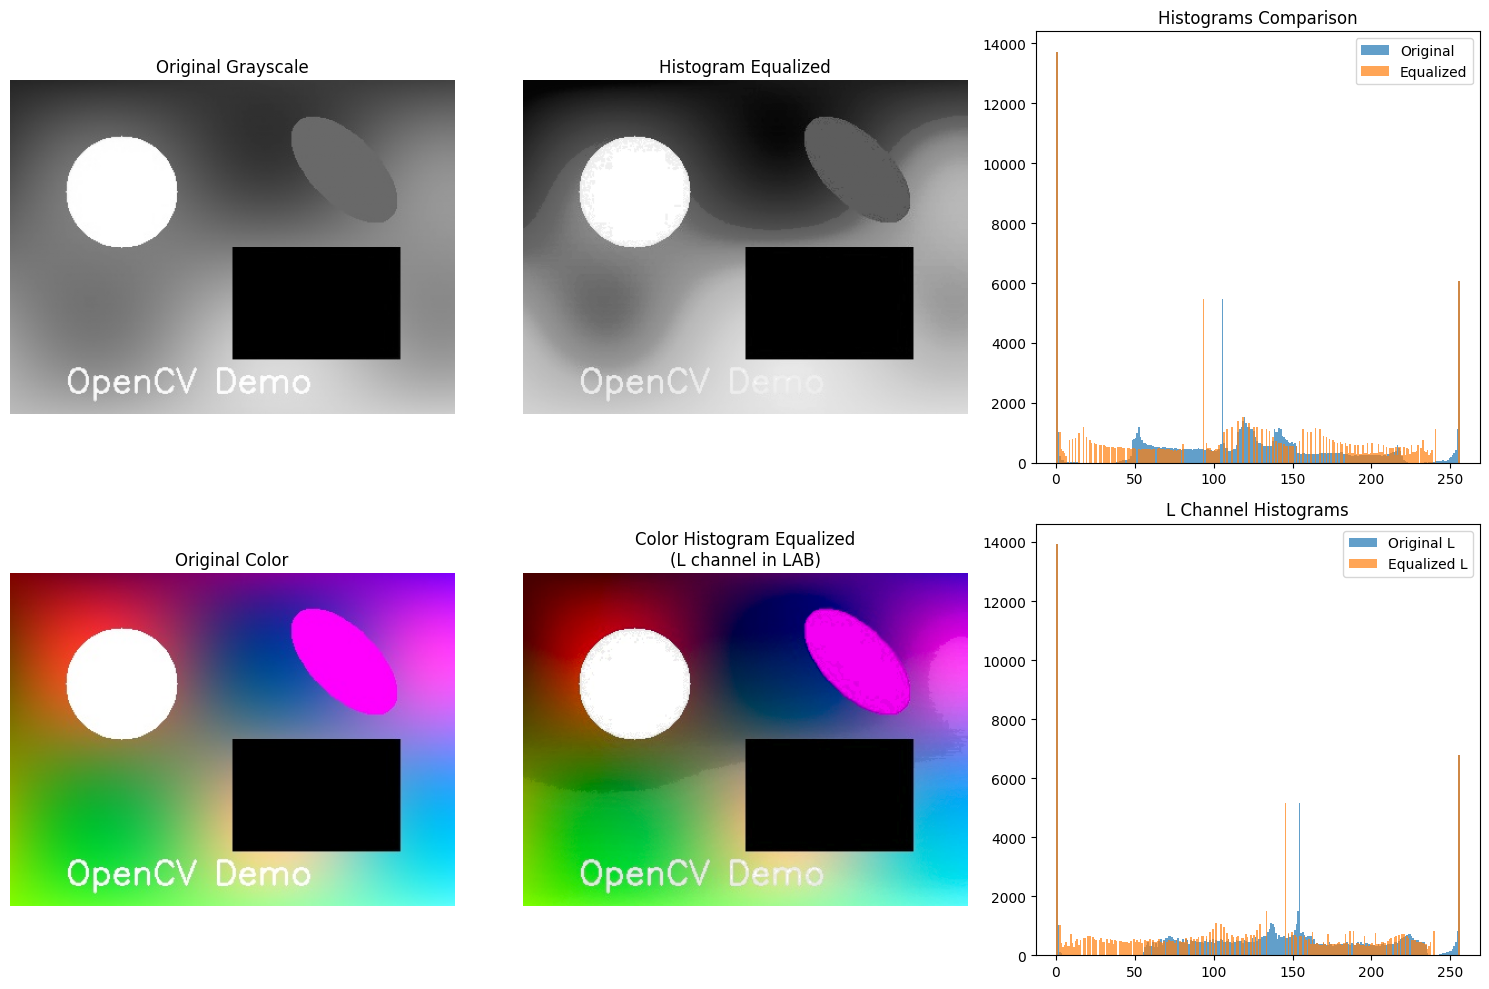

In [93]:
# Apply histogram equalization
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Standard histogram equalization
equalized = histogram.equalize_histogram(gray_image)

# Color histogram equalization (in LAB space)
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
lab[:,:,0] = cv2.equalizeHist(lab[:,:,0])  # Equalize L channel
equalized_color = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Grayscale equalization
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(equalized, cmap='gray')
axes[0, 1].set_title('Histogram Equalized')
axes[0, 1].axis('off')

# Histograms
axes[0, 2].hist(gray_image.ravel(), bins=256, range=[0,256], alpha=0.7, label='Original')
axes[0, 2].hist(equalized.ravel(), bins=256, range=[0,256], alpha=0.7, label='Equalized')
axes[0, 2].set_title('Histograms Comparison')
axes[0, 2].legend()

# Color equalization
axes[1, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Original Color')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Color Histogram Equalized\n(L channel in LAB)')
axes[1, 1].axis('off')

# Compare L channel histograms
lab_orig = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
axes[1, 2].hist(lab_orig[:,:,0].ravel(), bins=256, range=[0,256], alpha=0.7, label='Original L')
axes[1, 2].hist(lab[:,:,0].ravel(), bins=256, range=[0,256], alpha=0.7, label='Equalized L')
axes[1, 2].set_title('L Channel Histograms')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

### 3.3 CLAHE (Contrast Limited Adaptive Histogram Equalization)
Adaptive histogram equalization that prevents over-amplification of noise.

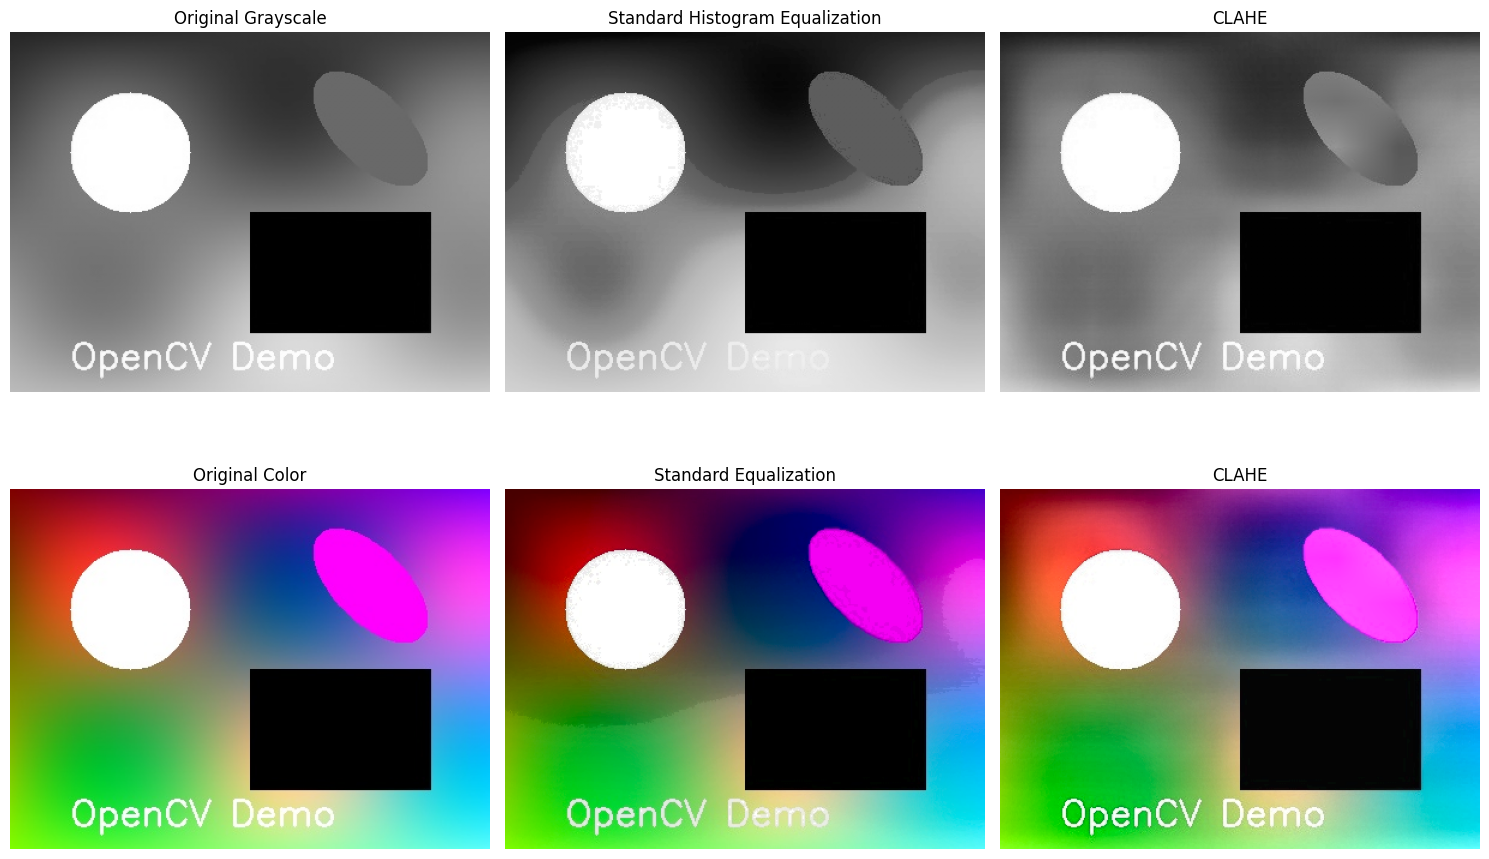

In [94]:
# Apply CLAHE
clahe_gray = histogram.clahe(gray_image, clip_limit=2.0, tile_grid_size=(8, 8))

# CLAHE on color image (LAB space)
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
lab[:,:,0] = clahe.apply(lab[:,:,0])
clahe_color = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

# Compare different enhancement methods
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Grayscale comparison
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(equalized, cmap='gray')
axes[0, 1].set_title('Standard Histogram Equalization')
axes[0, 1].axis('off')

axes[0, 2].imshow(clahe_gray, cmap='gray')
axes[0, 2].set_title('CLAHE')
axes[0, 2].axis('off')

# Color comparison
axes[1, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Original Color')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Standard Equalization')
axes[1, 1].axis('off')

axes[1, 2].imshow(cv2.cvtColor(clahe_color, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('CLAHE')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 4. Color Enhancement {#enhancement}

Techniques for improving color appearance and adjusting color properties.

### 4.1 Brightness and Contrast Adjustment

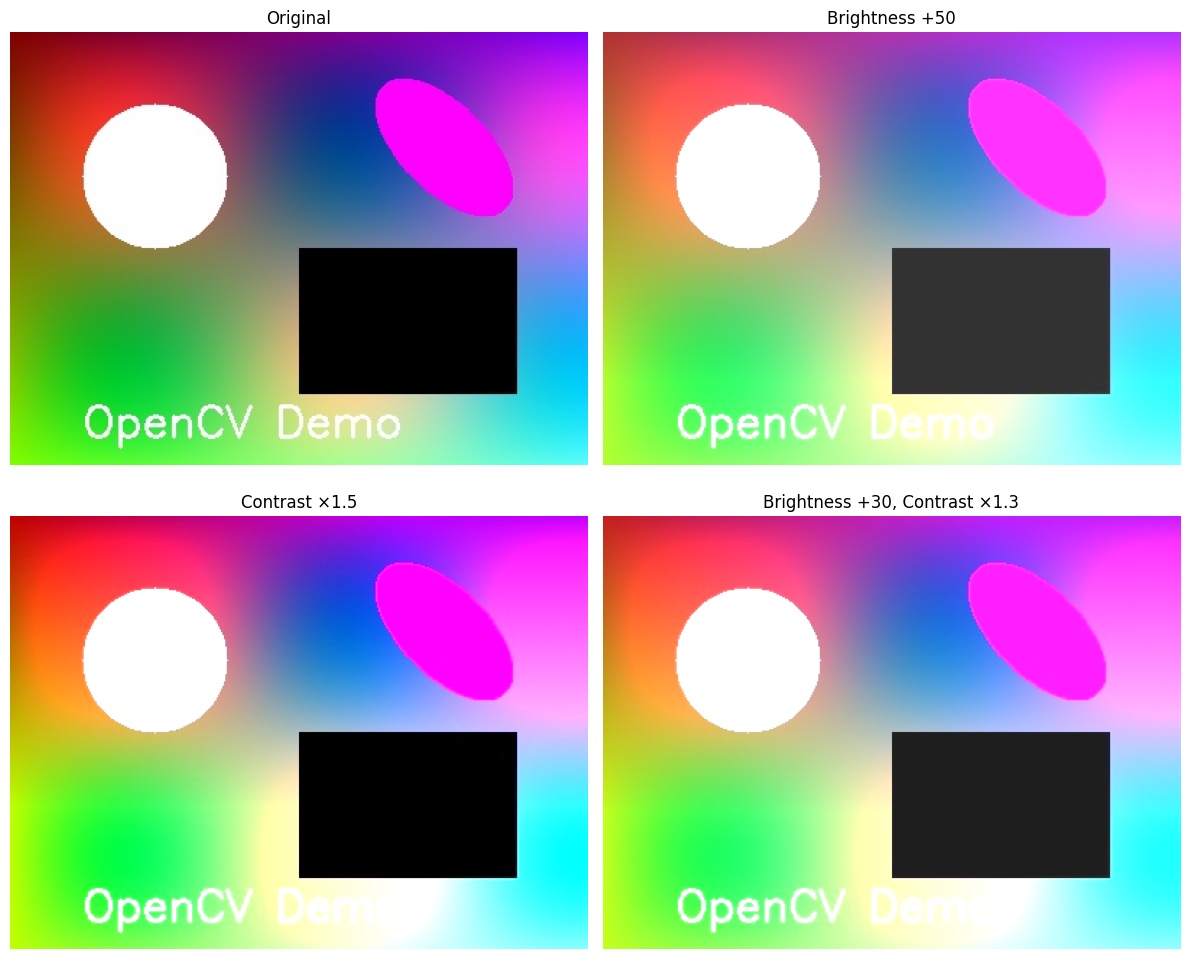

In [95]:
# Adjust brightness and contrast
bright_image = color_enhancement.adjust_brightness(image, beta=50)
contrast_image = color_enhancement.adjust_contrast(image, alpha=1.5)
bright_contrast_image = color_enhancement.adjust_brightness_contrast(image, alpha=1.3, beta=30)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Brightness +50')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Contrast ×1.5')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(bright_contrast_image, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Brightness +30, Contrast ×1.3')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### 4.2 Gamma Correction
Adjusting image gamma for better display or perception.

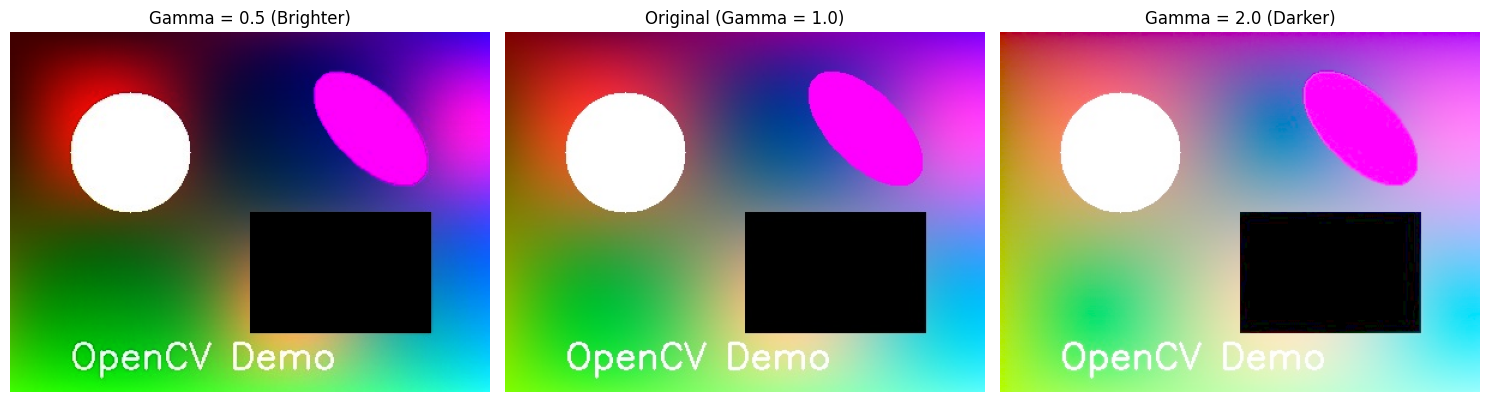

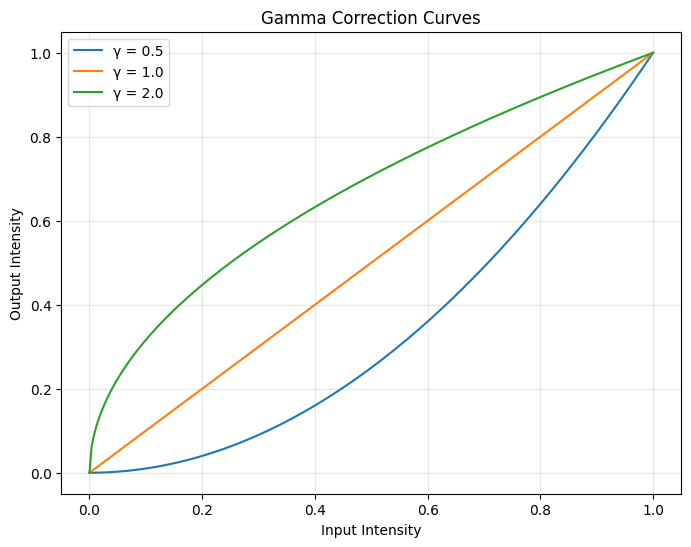

In [96]:
# Apply gamma correction
gamma_low = color_enhancement.gamma_correction(image, gamma=0.5)   # Brighten
gamma_high = color_enhancement.gamma_correction(image, gamma=2.0)  # Darken

# Display gamma correction results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(gamma_low, cv2.COLOR_BGR2RGB))
axes[0].set_title('Gamma = 0.5 (Brighter)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Original (Gamma = 1.0)')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(gamma_high, cv2.COLOR_BGR2RGB))
axes[2].set_title('Gamma = 2.0 (Darker)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Show gamma curve
gamma_values = np.linspace(0, 1, 256)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for gamma in [0.5, 1.0, 2.0]:
    corrected = np.power(gamma_values, 1.0/gamma)
    ax.plot(gamma_values, corrected, label=f'γ = {gamma}')

ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_title('Gamma Correction Curves')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

### 4.3 White Balance Correction

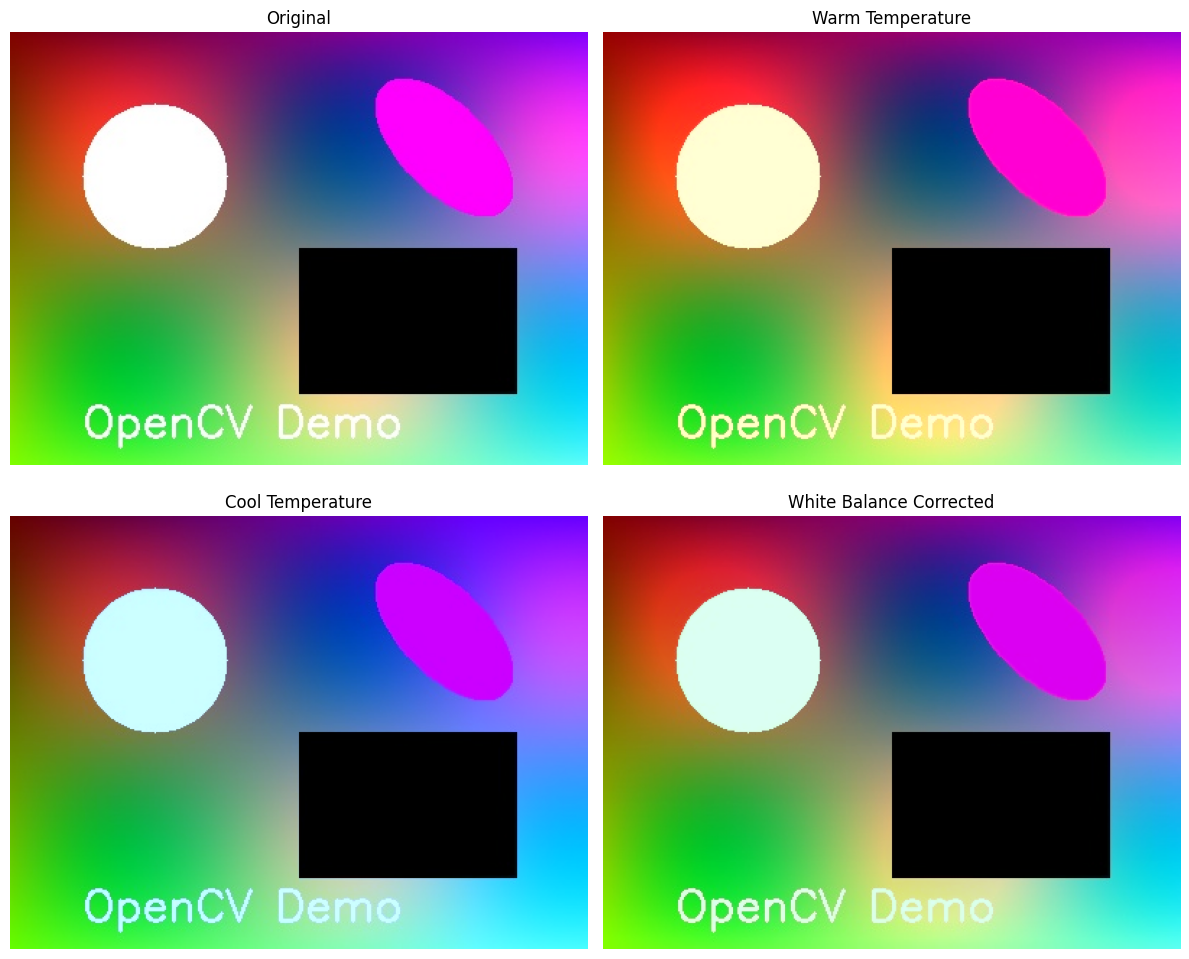

In [97]:
# Simulate color temperature shifts and correct them
warm_image = color_enhancement.adjust_color_temperature(image, temperature=1.2)  # Warmer
cool_image = color_enhancement.adjust_color_temperature(image, temperature=0.8)  # Cooler

# Apply white balance correction
wb_corrected = color_enhancement.white_balance_correction(warm_image)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(warm_image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Warm Temperature')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(cool_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Cool Temperature')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(wb_corrected, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('White Balance Corrected')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 5. Color-based Segmentation {#segmentation}

Using color information to segment objects from the background.

### 5.1 HSV Color Range Segmentation

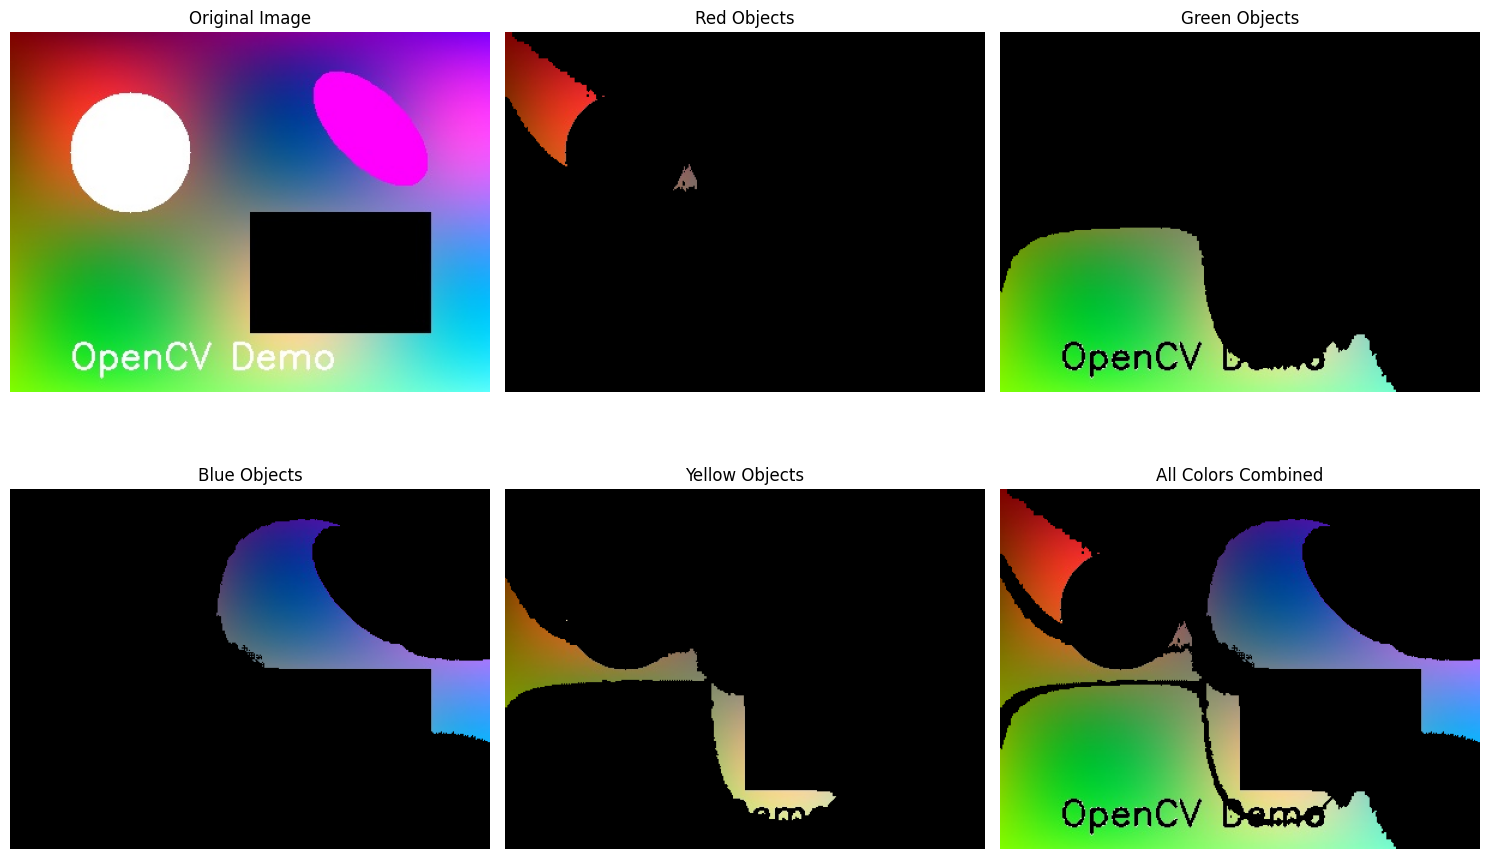

In [98]:
# Convert to HSV for color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges for different objects
color_ranges = {
    'Red': ([0, 50, 50], [10, 255, 255]),     # Red objects
    'Green': ([40, 50, 50], [80, 255, 255]),   # Green objects
    'Blue': ([100, 50, 50], [130, 255, 255]),  # Blue objects
    'Yellow': ([15, 50, 50], [35, 255, 255]),  # Yellow objects
}

# Create masks for each color
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Color masks
mask_positions = [(0, 1), (0, 2), (1, 0), (1, 1)]
colors = ['Red', 'Green', 'Blue', 'Yellow']

combined_mask = np.zeros(hsv.shape[:2], dtype=np.uint8)

for i, color in enumerate(colors):
    if i < 4:
        lower, upper = color_ranges[color]
        mask = cv2.inRange(hsv, np.array(lower), np.array(upper))
        
        # Apply mask to original image
        segmented = cv2.bitwise_and(image, image, mask=mask)
        
        row, col = mask_positions[i]
        axes[row, col].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(f'{color} Objects')
        axes[row, col].axis('off')
        
        # Add to combined mask
        combined_mask = cv2.bitwise_or(combined_mask, mask)

# Combined segmentation
combined_segmented = cv2.bitwise_and(image, image, mask=combined_mask)
axes[1, 2].imshow(cv2.cvtColor(combined_segmented, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('All Colors Combined')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 5.2 K-Means Color Clustering

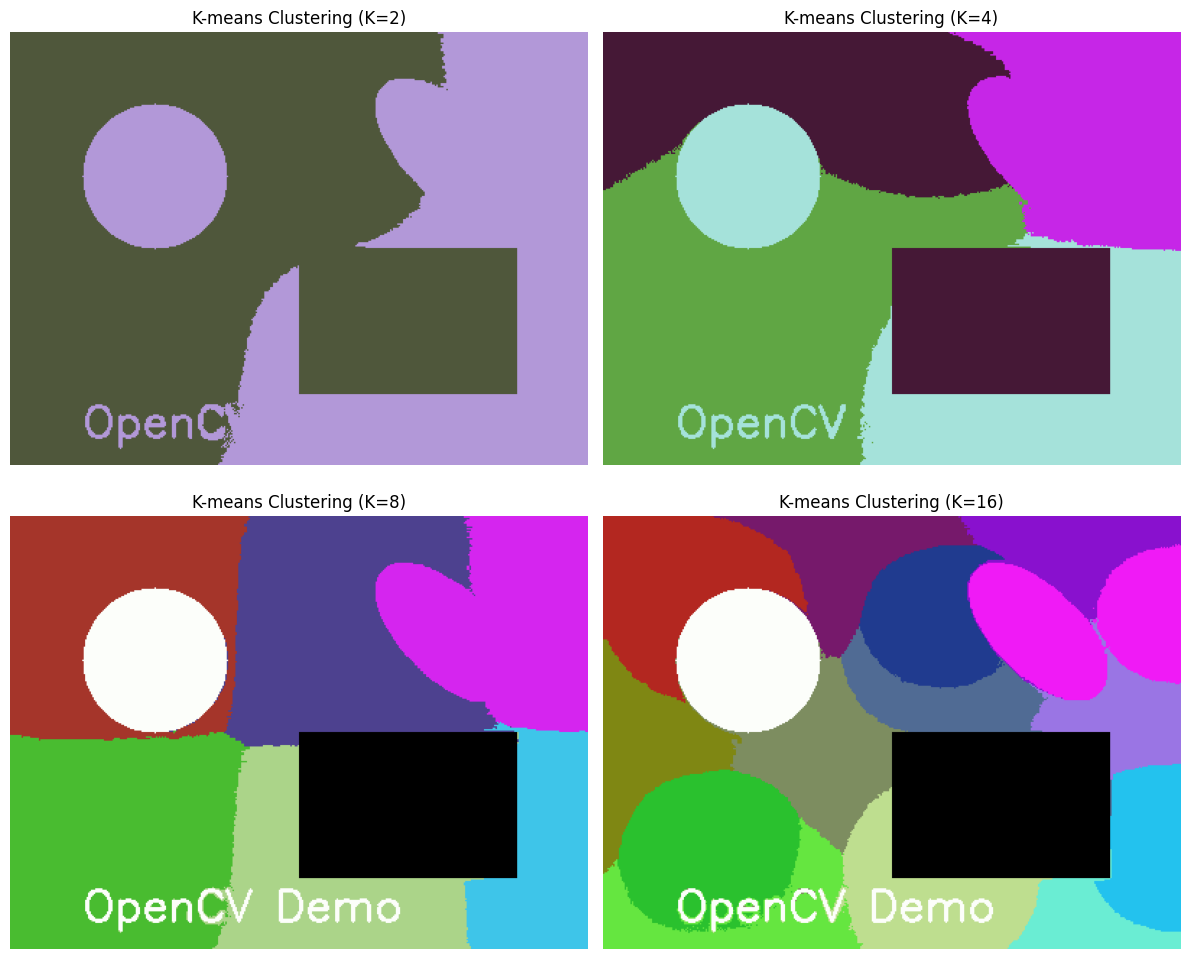

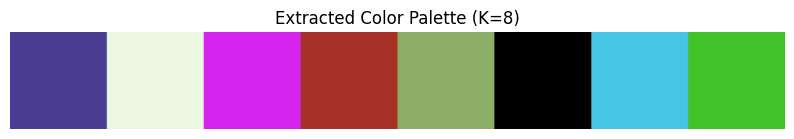

Extracted colors (RGB):
Color 1: RGB(73, 60, 145)
Color 2: RGB(236, 247, 226)
Color 3: RGB(214, 36, 239)
Color 4: RGB(167, 49, 39)
Color 5: RGB(141, 174, 102)
Color 6: RGB(0, 0, 0)
Color 7: RGB(70, 197, 229)
Color 8: RGB(65, 195, 41)


In [99]:
# Apply K-means clustering for color quantization
def color_quantization_kmeans(image, k=8):
    """Reduce number of colors using K-means clustering."""
    # Reshape image to be a list of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # Define criteria and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to uint8 and reshape
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape(image.shape)
    
    return segmented_image, centers

# Apply K-means with different K values
k_values = [2, 4, 8, 16]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, k in enumerate(k_values):
    quantized, centers = color_quantization_kmeans(image, k)
    
    row, col = i // 2, i % 2
    axes[row, col].imshow(cv2.cvtColor(quantized, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f'K-means Clustering (K={k})')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show color palette for K=8
quantized_8, centers_8 = color_quantization_kmeans(image, 8)

# Create color palette
palette = np.zeros((50, 400, 3), dtype=np.uint8)
for i, color in enumerate(centers_8):
    start_x = i * 50
    end_x = (i + 1) * 50
    palette[:, start_x:end_x] = color[::-1]  # BGR to RGB

plt.figure(figsize=(10, 3))
plt.imshow(palette)
plt.title('Extracted Color Palette (K=8)')
plt.axis('off')
plt.show()

print("Extracted colors (RGB):")
for i, color in enumerate(centers_8):
    print(f"Color {i+1}: RGB({color[2]}, {color[1]}, {color[0]})")

## 6. Practical Applications {#applications}

### 6.1 Skin Tone Detection

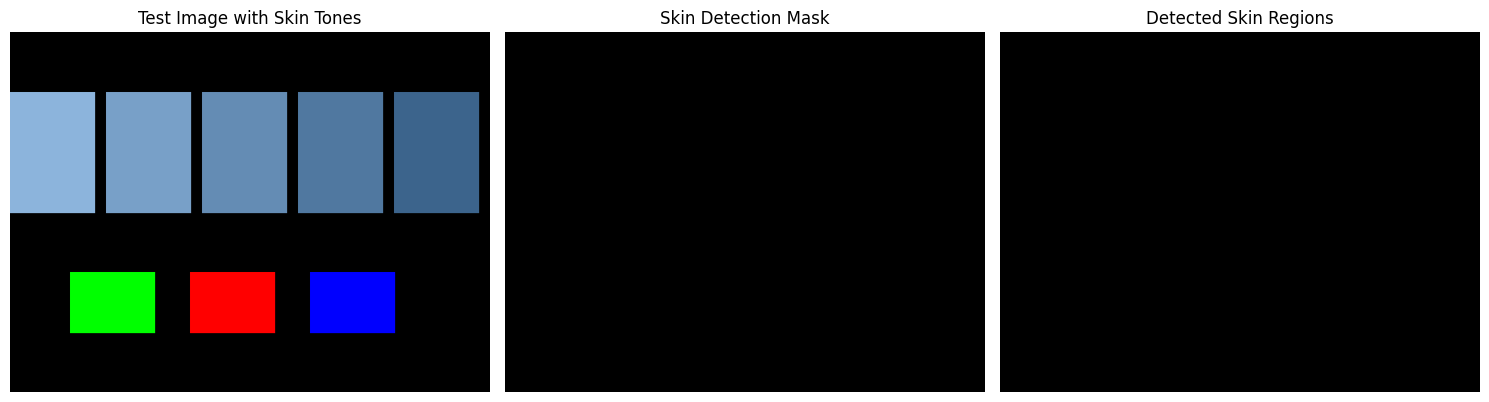

In [100]:
# Create an image with skin-like colors for demonstration
skin_image = np.zeros((300, 400, 3), dtype=np.uint8)

# Add various skin tones
skin_colors = [
    (220, 180, 140),  # Light skin
    (200, 160, 120),  # Medium-light skin  
    (180, 140, 100),  # Medium skin
    (160, 120, 80),   # Medium-dark skin
    (140, 100, 60),   # Dark skin
]

for i, color in enumerate(skin_colors):
    x = i * 80
    cv2.rectangle(skin_image, (x, 50), (x+70, 150), color, -1)

# Add non-skin colors
cv2.rectangle(skin_image, (50, 200), (120, 250), (0, 255, 0), -1)   # Green
cv2.rectangle(skin_image, (150, 200), (220, 250), (0, 0, 255), -1)  # Red
cv2.rectangle(skin_image, (250, 200), (320, 250), (255, 0, 0), -1)  # Blue

# Skin detection using multiple color spaces
def detect_skin_multichannel(image):
    """Detect skin using multiple color space rules."""
    # Convert to different color spaces
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    
    # HSV skin detection
    lower_hsv = np.array([0, 20, 70])
    upper_hsv = np.array([20, 255, 255])
    mask_hsv = cv2.inRange(hsv, lower_hsv, upper_hsv)
    
    # YCrCb skin detection
    lower_ycrcb = np.array([0, 133, 77])
    upper_ycrcb = np.array([255, 173, 127])
    mask_ycrcb = cv2.inRange(ycrcb, lower_ycrcb, upper_ycrcb)
    
    # Combine masks
    skin_mask = cv2.bitwise_and(mask_hsv, mask_ycrcb)
    
    return skin_mask

# Apply skin detection
skin_mask = detect_skin_multichannel(skin_image)
skin_detected = cv2.bitwise_and(skin_image, skin_image, mask=skin_mask)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(skin_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Test Image with Skin Tones')
axes[0].axis('off')

axes[1].imshow(skin_mask, cmap='gray')
axes[1].set_title('Skin Detection Mask')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(skin_detected, cv2.COLOR_BGR2RGB))
axes[2].set_title('Detected Skin Regions')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### 6.2 Color-based Object Tracking

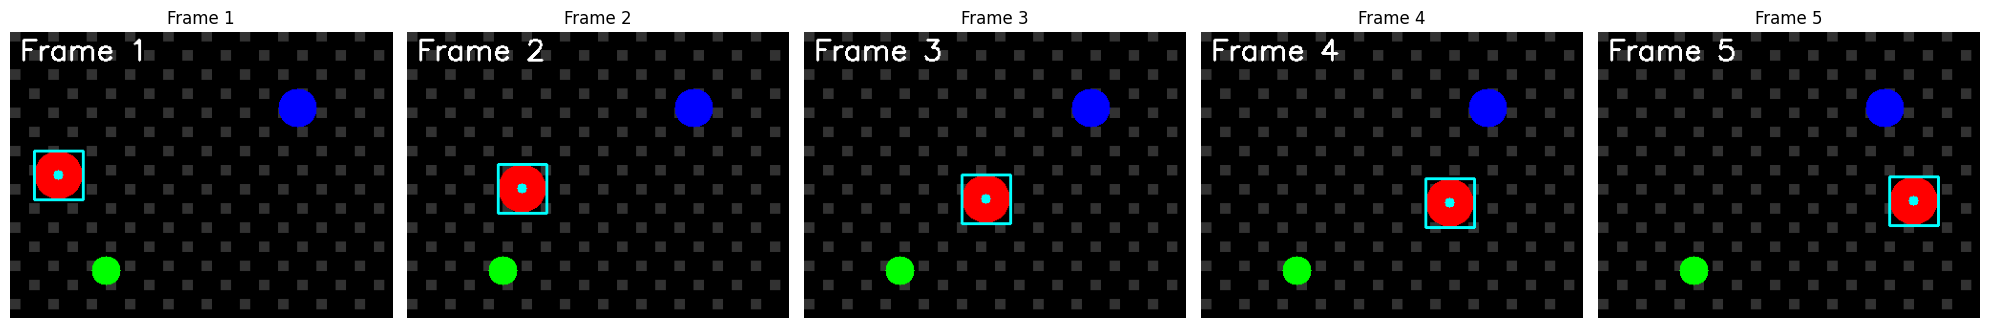

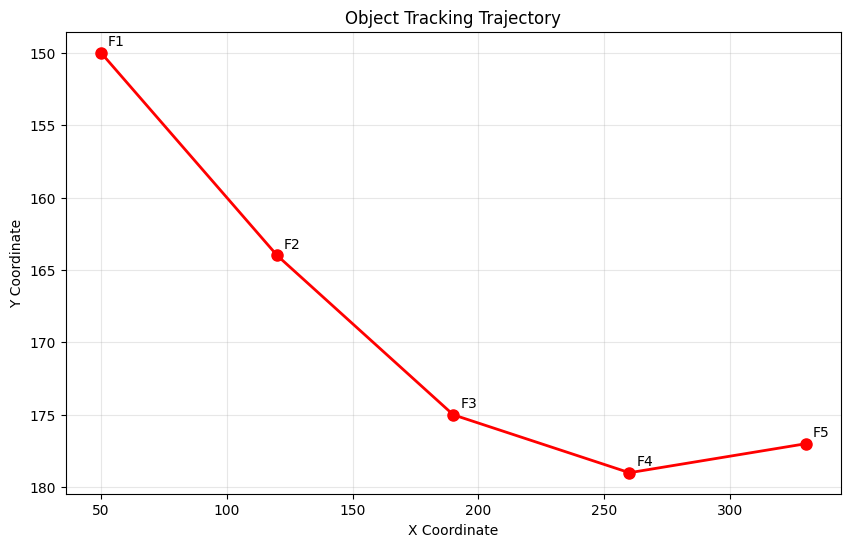

Tracking Results:
Frame 1: Object center at (50, 150)
Frame 2: Object center at (120, 164)
Frame 3: Object center at (190, 175)
Frame 4: Object center at (260, 179)
Frame 5: Object center at (330, 177)


In [101]:
# Simulate object tracking by color
def create_tracking_sequence():
    """Create a sequence of images with a moving colored object."""
    frames = []
    
    for i in range(5):
        frame = np.zeros((300, 400, 3), dtype=np.uint8)
        
        # Add background pattern
        for y in range(0, 300, 20):
            for x in range(0, 400, 20):
                if (x + y) % 40 == 0:
                    cv2.rectangle(frame, (x, y), (x+10, y+10), (50, 50, 50), -1)
        
        # Add moving object (red circle)
        center_x = 50 + i * 70
        center_y = 150 + int(30 * np.sin(i * 0.5))
        cv2.circle(frame, (center_x, center_y), 25, (0, 0, 255), -1)
        
        # Add noise objects
        cv2.circle(frame, (100, 250), 15, (0, 255, 0), -1)  # Green distractor
        cv2.circle(frame, (300, 80), 20, (255, 0, 0), -1)   # Blue distractor
        
        frames.append(frame)
    
    return frames

# Create tracking sequence
tracking_frames = create_tracking_sequence()

# Track red object
def track_red_object(image):
    """Track red object using color segmentation."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Red color range (accounting for hue wrap-around)
    lower_red1 = np.array([0, 120, 70])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])
    
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Find largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Get bounding box
        x, y, w, h = cv2.boundingRect(largest_contour)
        center = (x + w//2, y + h//2)
        
        return center, (x, y, w, h)
    
    return None, None

# Track object through sequence
tracking_results = []
fig, axes = plt.subplots(1, len(tracking_frames), figsize=(20, 4))

for i, frame in enumerate(tracking_frames):
    center, bbox = track_red_object(frame)
    
    # Draw tracking result
    result_frame = frame.copy()
    if center and bbox:
        x, y, w, h = bbox
        cv2.rectangle(result_frame, (x, y), (x+w, y+h), (255, 255, 0), 2)
        cv2.circle(result_frame, center, 5, (255, 255, 0), -1)
        cv2.putText(result_frame, f'Frame {i+1}', (10, 30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
        tracking_results.append(center)
    
    axes[i].imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Frame {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Plot tracking trajectory
if tracking_results:
    x_coords = [center[0] for center in tracking_results]
    y_coords = [center[1] for center in tracking_results]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_coords, y_coords, 'ro-', linewidth=2, markersize=8)
    plt.title('Object Tracking Trajectory')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True, alpha=0.3)
    plt.gca().invert_yaxis()  # Invert Y axis to match image coordinates
    
    # Annotate frames
    for i, (x, y) in enumerate(tracking_results):
        plt.annotate(f'F{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')
    
    plt.show()
    
    print("Tracking Results:")
    for i, center in enumerate(tracking_results):
        print(f"Frame {i+1}: Object center at {center}")

## 7. Exercises {#exercises}

Try these exercises to practice color processing techniques:

### Exercise 1: Custom Color Space Conversion

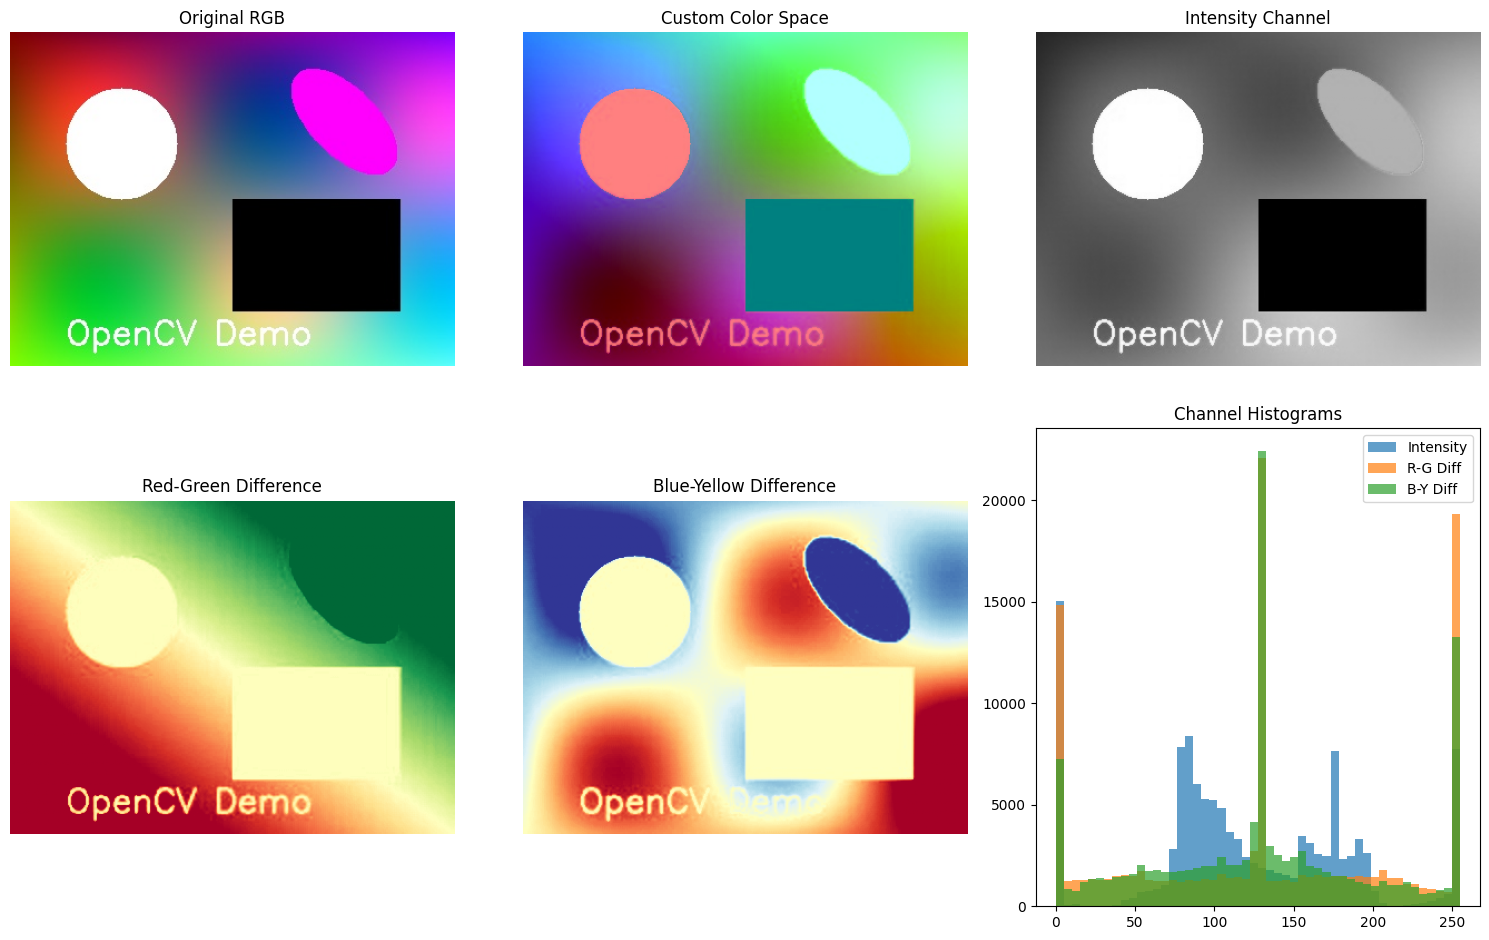

Custom Color Space Analysis:
Intensity: Mean = 118.0, Std = 67.6
R-G Difference: Mean = 130.5, Std = 84.2
B-Y Difference: Mean = 130.2, Std = 71.6


In [102]:
# Exercise 1: Create a custom color space
def rgb_to_custom_space(image):
    """Convert RGB to a custom color space that emphasizes certain features."""
    # Custom transformation that emphasizes color differences
    r, g, b = cv2.split(image.astype(np.float32))
    
    # Channel 1: Color intensity (similar to luminance but different weights)
    intensity = 0.4 * r + 0.3 * g + 0.3 * b
    
    # Channel 2: Red-Green difference (chrominance)
    rg_diff = (r - g) + 128  # Add offset to handle negative values
    
    # Channel 3: Blue-Yellow difference (chrominance)
    by_diff = (b - (r + g) / 2) + 128  # Add offset
    
    # Normalize to 0-255 range
    intensity = np.clip(intensity, 0, 255)
    rg_diff = np.clip(rg_diff, 0, 255)
    by_diff = np.clip(by_diff, 0, 255)
    
    custom_image = cv2.merge([intensity, rg_diff, by_diff]).astype(np.uint8)
    return custom_image

# Apply custom color space conversion
custom_space = rgb_to_custom_space(image)
custom_channels = cv2.split(custom_space)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original and custom space
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original RGB')
axes[0, 0].axis('off')

axes[0, 1].imshow(custom_space)
axes[0, 1].set_title('Custom Color Space')
axes[0, 1].axis('off')

# Custom space channels
axes[0, 2].imshow(custom_channels[0], cmap='gray')
axes[0, 2].set_title('Intensity Channel')
axes[0, 2].axis('off')

axes[1, 0].imshow(custom_channels[1], cmap='RdYlGn')
axes[1, 0].set_title('Red-Green Difference')
axes[1, 0].axis('off')

axes[1, 1].imshow(custom_channels[2], cmap='RdYlBu')
axes[1, 1].set_title('Blue-Yellow Difference')
axes[1, 1].axis('off')

# Channel statistics
axes[1, 2].hist(custom_channels[0].ravel(), bins=50, alpha=0.7, label='Intensity')
axes[1, 2].hist(custom_channels[1].ravel(), bins=50, alpha=0.7, label='R-G Diff')
axes[1, 2].hist(custom_channels[2].ravel(), bins=50, alpha=0.7, label='B-Y Diff')
axes[1, 2].set_title('Channel Histograms')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("Custom Color Space Analysis:")
for i, name in enumerate(['Intensity', 'R-G Difference', 'B-Y Difference']):
    mean_val = np.mean(custom_channels[i])
    std_val = np.std(custom_channels[i])
    print(f"{name}: Mean = {mean_val:.1f}, Std = {std_val:.1f}")

### Exercise 2: Adaptive Color Enhancement

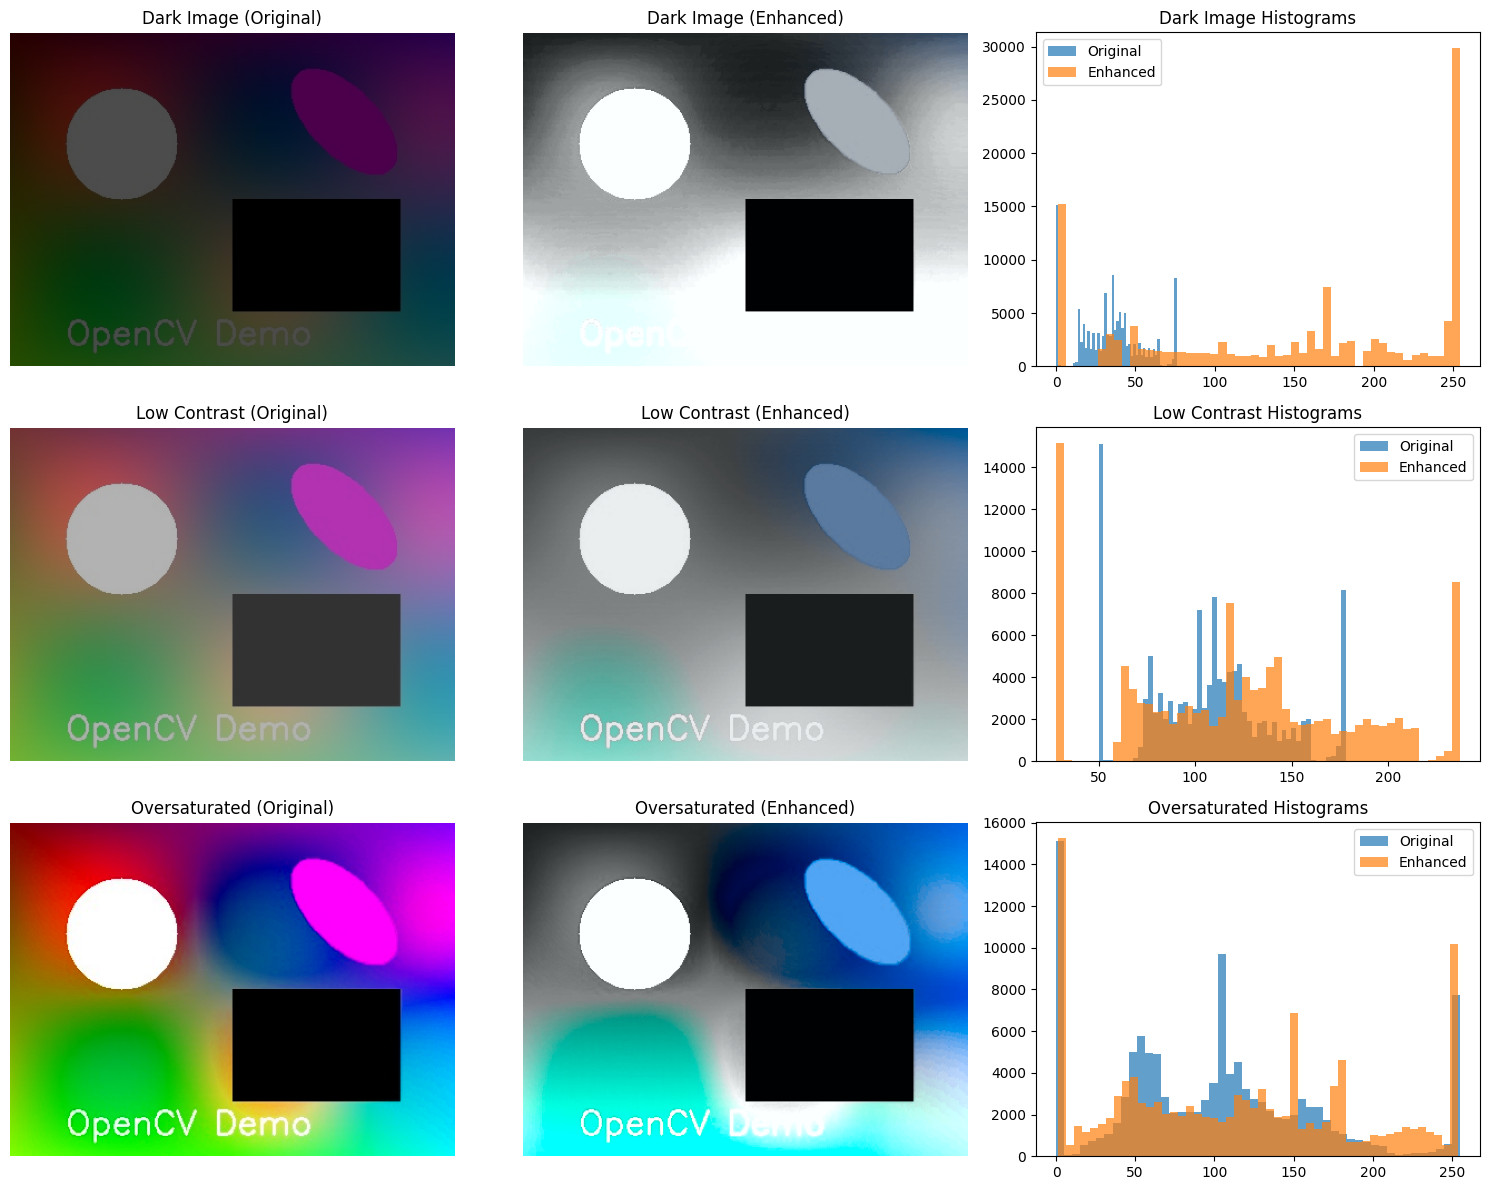

Adaptive Enhancement Results:
------------------------------------------------------------
Image Type      Orig Mean  Enh Mean   Orig Std   Enh Std   
------------------------------------------------------------
Dark Image      34.3       150.3      20.7       90.6      
Low Contrast    108.0      124.6      34.6       59.9      
Oversaturated   100.0      114.7      67.8       79.2      


In [103]:
# Exercise 2: Adaptive color enhancement based on image statistics
def adaptive_color_enhancement(image, target_mean=128, target_contrast=1.5):
    """Adaptively enhance image colors based on current statistics."""
    # Convert to LAB for better perceptual processing
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB).astype(np.float32)
    l, a, b = cv2.split(lab)
    
    # Adaptive lightness adjustment
    current_mean = np.mean(l)
    brightness_factor = target_mean / current_mean if current_mean > 0 else 1.0
    l_enhanced = l * brightness_factor
    
    # Adaptive contrast adjustment
    current_std = np.std(l)
    target_std = current_std * target_contrast
    contrast_factor = target_std / current_std if current_std > 0 else 1.0
    
    # Apply contrast around the mean
    l_enhanced = (l_enhanced - current_mean) * contrast_factor + current_mean
    
    # Adaptive color saturation enhancement
    a_enhanced = a * 1.2  # Boost green-red
    b_enhanced = b * 1.2  # Boost blue-yellow
    
    # Clip values to valid range
    l_enhanced = np.clip(l_enhanced, 0, 255)
    a_enhanced = np.clip(a_enhanced, -128, 127)
    b_enhanced = np.clip(b_enhanced, -128, 127)
    
    # Merge and convert back
    enhanced_lab = cv2.merge([l_enhanced, a_enhanced, b_enhanced]).astype(np.uint8)
    enhanced_bgr = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
    
    return enhanced_bgr

# Create test images with different characteristics
test_images = []

# Dark image
dark_image = (image * 0.3).astype(np.uint8)
test_images.append(('Dark Image', dark_image))

# Low contrast image
low_contrast = cv2.convertScaleAbs(image, alpha=0.5, beta=50)
test_images.append(('Low Contrast', low_contrast))

# Oversaturated image
hsv_temp = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype(np.float32)
hsv_temp[:,:,1] *= 2.0  # Double saturation
hsv_temp[:,:,1] = np.clip(hsv_temp[:,:,1], 0, 255)
oversaturated = cv2.cvtColor(hsv_temp.astype(np.uint8), cv2.COLOR_HSV2BGR)
test_images.append(('Oversaturated', oversaturated))

# Apply adaptive enhancement
fig, axes = plt.subplots(len(test_images), 3, figsize=(15, 12))

for i, (name, test_img) in enumerate(test_images):
    # Original test image
    axes[i, 0].imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'{name} (Original)')
    axes[i, 0].axis('off')
    
    # Enhanced image
    enhanced = adaptive_color_enhancement(test_img)
    axes[i, 1].imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(f'{name} (Enhanced)')
    axes[i, 1].axis('off')
    
    # Comparison histograms
    gray_orig = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    gray_enhanced = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
    
    axes[i, 2].hist(gray_orig.ravel(), bins=50, alpha=0.7, label='Original')
    axes[i, 2].hist(gray_enhanced.ravel(), bins=50, alpha=0.7, label='Enhanced')
    axes[i, 2].set_title(f'{name} Histograms')
    axes[i, 2].legend()

plt.tight_layout()
plt.show()

# Print enhancement statistics
print("Adaptive Enhancement Results:")
print("-" * 60)
print(f"{'Image Type':<15} {'Orig Mean':<10} {'Enh Mean':<10} {'Orig Std':<10} {'Enh Std':<10}")
print("-" * 60)

for name, test_img in test_images:
    enhanced = adaptive_color_enhancement(test_img)
    
    gray_orig = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    gray_enhanced = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
    
    orig_mean = np.mean(gray_orig)
    enh_mean = np.mean(gray_enhanced)
    orig_std = np.std(gray_orig)
    enh_std = np.std(gray_enhanced)
    
    print(f"{name:<15} {orig_mean:<10.1f} {enh_mean:<10.1f} {orig_std:<10.1f} {enh_std:<10.1f}")

### Exercise 3: Color Harmony Analysis

/var/folders/cp/_pjh4tv50jv96b4b2_xp6l2c0000gp/T/ipykernel_99592/629429372.py:42: RuntimeWarning: overflow encountered in scalar subtract
  diff = min(abs(hues[i] - hues[j]), 180 - abs(hues[i] - hues[j]))


AttributeError: 'Axes' object has no attribute 'set_theta_zero_location'

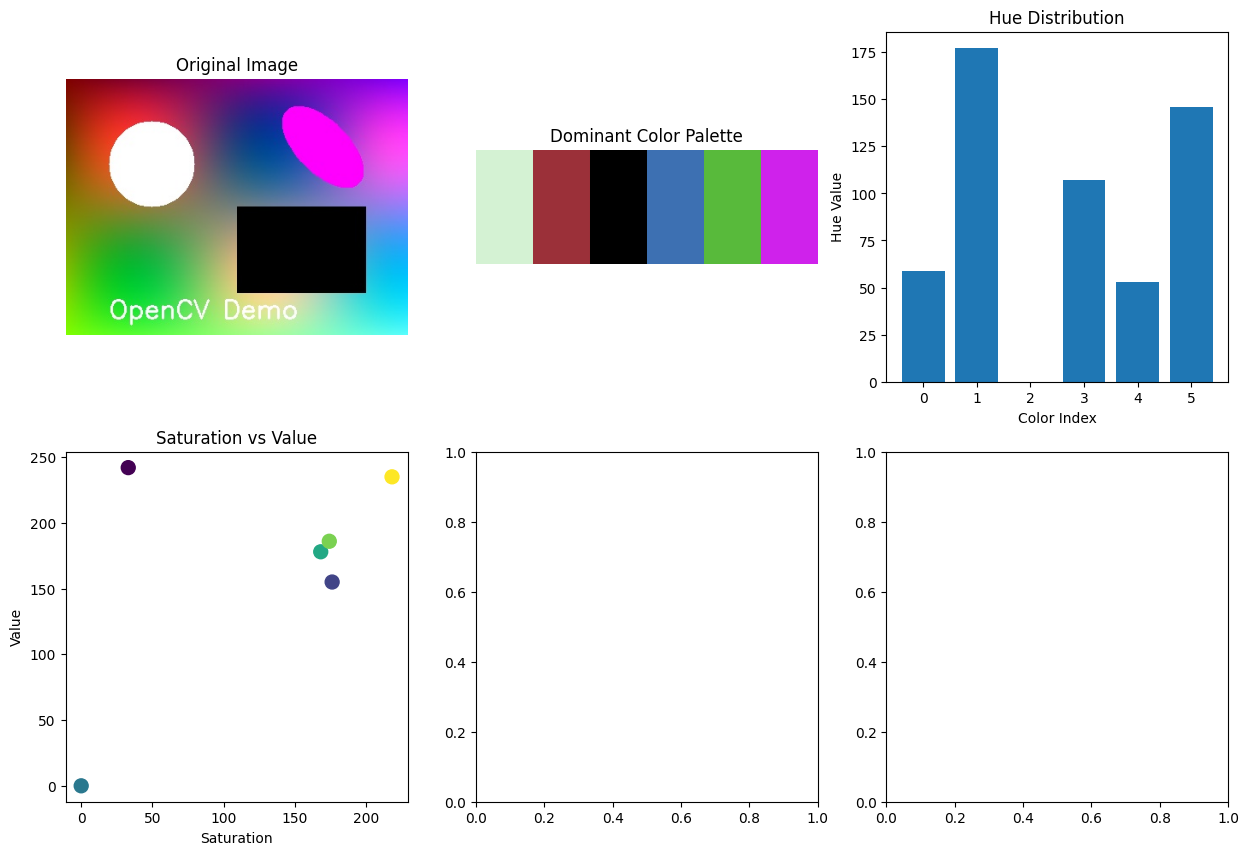

In [ ]:
# Exercise 3: Analyze color harmony in images
def analyze_color_harmony(image, n_colors=5):
    """Analyze color harmony using dominant colors and color theory."""
    # Extract dominant colors using K-means
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    _, labels, centers = cv2.kmeans(pixel_values, n_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert to HSV for color analysis
    centers_rgb = centers.astype(np.uint8).reshape(-1, 1, 3)
    centers_hsv = cv2.cvtColor(centers_rgb, cv2.COLOR_BGR2HSV).reshape(-1, 3)
    
    # Calculate color relationships
    hues = centers_hsv[:, 0]
    saturations = centers_hsv[:, 1]
    values = centers_hsv[:, 2]
    
    # Analyze harmony types
    harmony_analysis = {
        'dominant_colors': centers,
        'hues': hues,
        'saturations': saturations,
        'values': values,
        'harmony_type': classify_harmony(hues),
        'color_temperature': analyze_temperature(centers),
        'contrast_level': analyze_contrast(values)
    }
    
    return harmony_analysis

def classify_harmony(hues):
    """Classify the type of color harmony."""
    if len(hues) < 2:
        return "Monochromatic"
    
    # Calculate hue differences
    hue_diffs = []
    for i in range(len(hues)):
        for j in range(i+1, len(hues)):
            diff = min(abs(hues[i] - hues[j]), 180 - abs(hues[i] - hues[j]))
            hue_diffs.append(diff)
    
    avg_diff = np.mean(hue_diffs)
    
    if avg_diff < 30:
        return "Analogous"
    elif any(diff > 150 for diff in hue_diffs):
        return "Complementary"
    elif any(60 < diff < 90 for diff in hue_diffs):
        return "Triadic"
    else:
        return "Complex"

def analyze_temperature(colors):
    """Analyze overall color temperature."""
    # Convert BGR to RGB for analysis
    rgb_colors = colors[:, [2, 1, 0]]
    
    # Calculate color temperature based on red/blue balance
    red_avg = np.mean(rgb_colors[:, 0])
    blue_avg = np.mean(rgb_colors[:, 2])
    
    if red_avg > blue_avg + 20:
        return "Warm"
    elif blue_avg > red_avg + 20:
        return "Cool"
    else:
        return "Neutral"

def analyze_contrast(values):
    """Analyze contrast level."""
    value_range = np.max(values) - np.min(values)
    
    if value_range > 150:
        return "High"
    elif value_range > 75:
        return "Medium"
    else:
        return "Low"

# Analyze color harmony in test image
harmony_info = analyze_color_harmony(image, n_colors=6)

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Color palette
palette_height = 100
palette_width = 300
palette = np.zeros((palette_height, palette_width, 3), dtype=np.uint8)

n_colors = len(harmony_info['dominant_colors'])
color_width = palette_width // n_colors

for i, color in enumerate(harmony_info['dominant_colors']):
    start_x = i * color_width
    end_x = (i + 1) * color_width
    palette[:, start_x:end_x] = color[::-1]  # BGR to RGB

axes[0, 1].imshow(palette)
axes[0, 1].set_title('Dominant Color Palette')
axes[0, 1].axis('off')

# Hue distribution
axes[0, 2].bar(range(len(harmony_info['hues'])), harmony_info['hues'])
axes[0, 2].set_title('Hue Distribution')
axes[0, 2].set_xlabel('Color Index')
axes[0, 2].set_ylabel('Hue Value')

# Saturation vs Value plot
axes[1, 0].scatter(harmony_info['saturations'], harmony_info['values'], 
                   c=range(len(harmony_info['saturations'])), cmap='viridis', s=100)
axes[1, 0].set_xlabel('Saturation')
axes[1, 0].set_ylabel('Value')
axes[1, 0].set_title('Saturation vs Value')

# Color wheel representation
# Create polar subplot for color wheel
axes[1, 1] = plt.subplot(2, 3, 5, projection='polar')
axes[1, 1].set_theta_zero_location('N')

# Plot hues on color wheel
hue_angles = harmony_info['hues'] * 2 * np.pi / 180
for i, (angle, sat, val) in enumerate(zip(hue_angles, harmony_info['saturations'], harmony_info['values'])):
    axes[1, 1].scatter(angle, sat, s=val*2, alpha=0.7, label=f'Color {i+1}')

axes[1, 1].set_title('Color Wheel Distribution')
axes[1, 1].set_ylim(0, 255)

# Harmony analysis text
analysis_text = f"""
Color Harmony Analysis:

Harmony Type: {harmony_info['harmony_type']}
Color Temperature: {harmony_info['color_temperature']}
Contrast Level: {harmony_info['contrast_level']}

Number of Dominant Colors: {len(harmony_info['dominant_colors'])}

Hue Range: {np.min(harmony_info['hues']):.0f}° - {np.max(harmony_info['hues']):.0f}°
Saturation Range: {np.min(harmony_info['saturations']):.0f} - {np.max(harmony_info['saturations']):.0f}
Value Range: {np.min(harmony_info['values']):.0f} - {np.max(harmony_info['values']):.0f}
"""

axes[1, 2].text(0.1, 0.5, analysis_text, fontsize=10, verticalalignment='center')
axes[1, 2].set_title('Harmony Analysis')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("Detailed Color Harmony Analysis:")
print("="*50)
print(f"Harmony Type: {harmony_info['harmony_type']}")
print(f"Color Temperature: {harmony_info['color_temperature']}")
print(f"Contrast Level: {harmony_info['contrast_level']}")
print(f"Number of Dominant Colors: {len(harmony_info['dominant_colors'])}")
print("\nDominant Colors (BGR):")
for i, color in enumerate(harmony_info['dominant_colors']):
    print(f"  Color {i+1}: ({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f})")
print(f"\nHue Distribution: {harmony_info['hues']}")
print(f"Saturation Distribution: {harmony_info['saturations']}")
print(f"Value Distribution: {harmony_info['values']}")

## Summary

In this notebook, we explored:

1. **Color Space Conversions**: RGB, HSV, LAB, and grayscale conversions
2. **Histogram Analysis**: Color histograms, equalization, and CLAHE
3. **Color Enhancement**: Brightness/contrast adjustment, gamma correction, white balance
4. **Color-based Segmentation**: HSV range segmentation and K-means clustering
5. **Practical Applications**: Skin detection, color tracking, and object segmentation
6. **Advanced Techniques**: Custom color spaces, adaptive enhancement, and harmony analysis

### Key Takeaways:
- Different color spaces are suitable for different tasks
- HSV is excellent for color-based segmentation
- LAB provides perceptually uniform color differences
- Histogram analysis reveals image characteristics
- Color enhancement can dramatically improve image quality
- Color-based methods enable robust object detection and tracking

### Best Practices:
- Choose appropriate color space for your specific task
- Use HSV for color-based segmentation and filtering
- Apply histogram equalization carefully to avoid over-enhancement
- Consider perceptual color spaces (LAB) for color matching
- Combine multiple color spaces for robust detection
- Test color-based algorithms across different lighting conditions

### Next Steps:
- Experiment with different color spaces for your applications
- Try color-based segmentation on real-world images
- Implement advanced color enhancement algorithms
- Explore color constancy and white balance techniques
- Apply color analysis to artistic and design applications
- Combine color processing with machine learning for better results